In [1]:
#Import Lib files

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read CSV File

retail = pd.read_csv('SampleSuperstore.csv')
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#Let's do some EDA Part

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#Check duplicates Values

retail.duplicated().sum()

17

In [8]:
#remove duplicates value

retail.drop_duplicates(inplace=True)

In [9]:
#Check NAN Values

retail.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [19]:
#Drop Unwanted Columns

retail.drop(['Country','City','State','Region'], inplace=True, axis=1)

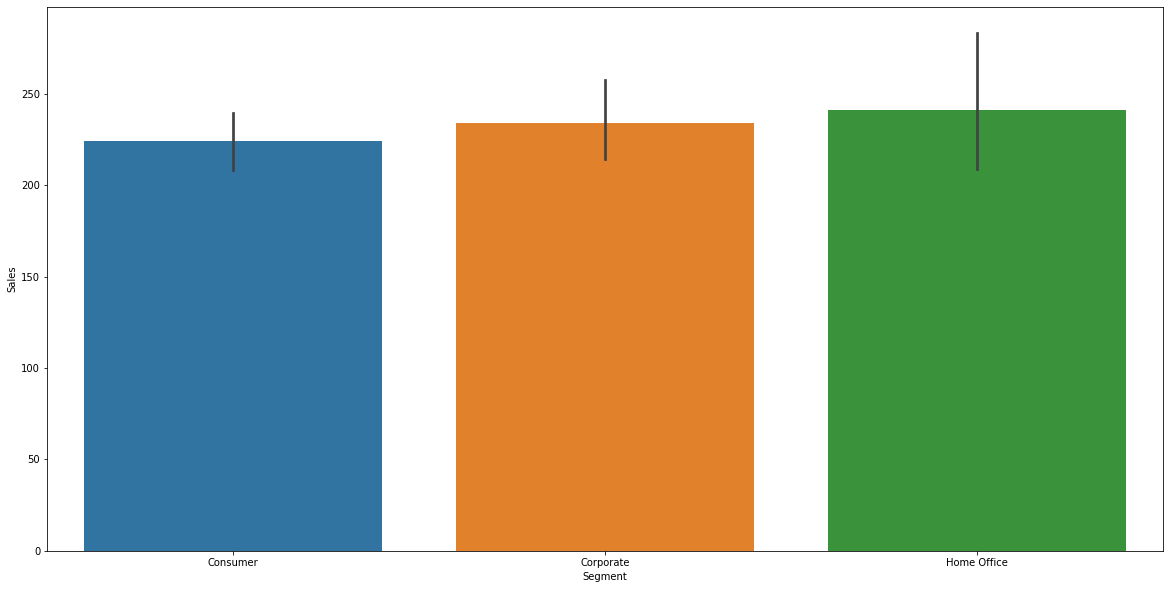

In [25]:
#Check Profit on Segment
plt.figure(figsize=(20,10))

sns.barplot(x=retail['Segment'], y=retail['Sales'])

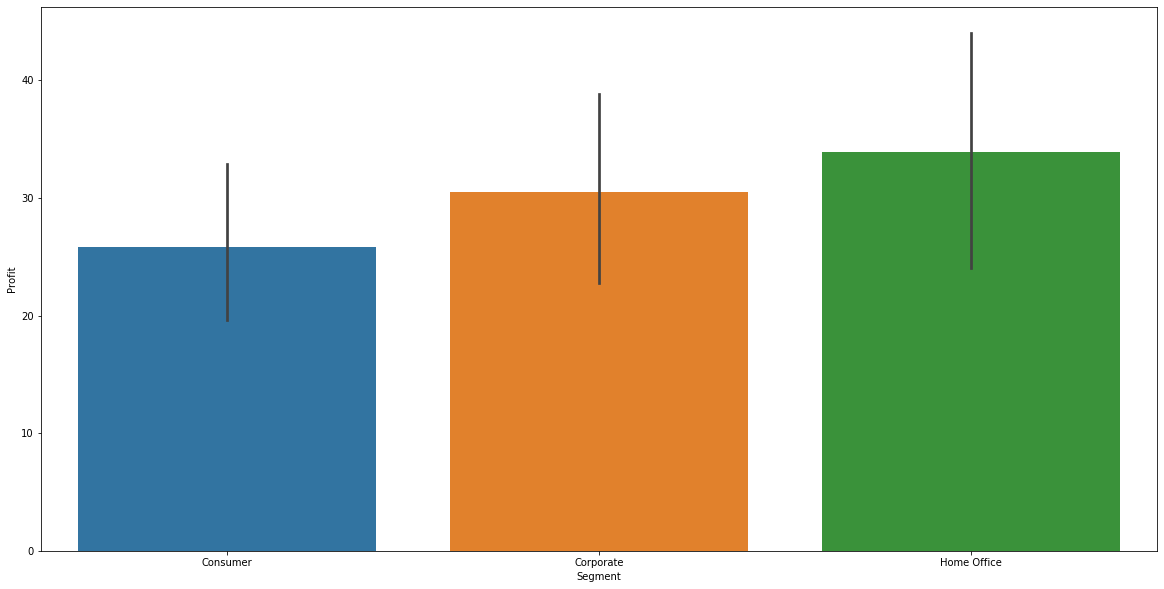

In [26]:
#Check Profit on Segment types

#Check Profit on Segment
plt.figure(figsize=(20,10))

sns.barplot(x=retail['Segment'], y=retail['Profit'])

In [29]:
#Change String value in numeric

from sklearn.preprocessing import LabelEncoder

leb = LabelEncoder()

retail['Ship Mode']= leb.fit_transform(retail['Ship Mode'])
retail['Segment']= leb.fit_transform(retail['Segment'])
retail['Category']= leb.fit_transform(retail['Category'])
retail['Sub-Category']= leb.fit_transform(retail['Sub-Category'])

In [30]:
retail.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ship Mode,9977.0,2.234439,1.101170,0.000,2.0000,3.000,3.000,3.000
Segment,9977.0,0.658815,0.762533,0.000,0.0000,0.000,1.000,2.000
Postal Code,9977.0,55154.964117,32058.266816,1040.000,23223.0000,55901.000,90008.000,99301.000
Category,9977.0,0.972838,0.629854,0.000,1.0000,1.000,1.000,2.000
Sub-Category,9977.0,7.586750,5.052880,0.000,3.0000,9.000,12.000,16.000
Sales,9977.0,230.148902,623.721409,0.444,17.3000,54.816,209.970,22638.480
Quantity,9977.0,3.790719,2.226657,1.000,2.0000,3.000,5.000,14.000
Discount,9977.0,0.156278,0.206455,0.000,0.0000,0.200,0.200,0.800
Profit,9977.0,28.690130,234.457840,-6599.978,1.7262,8.671,29.372,8399.976


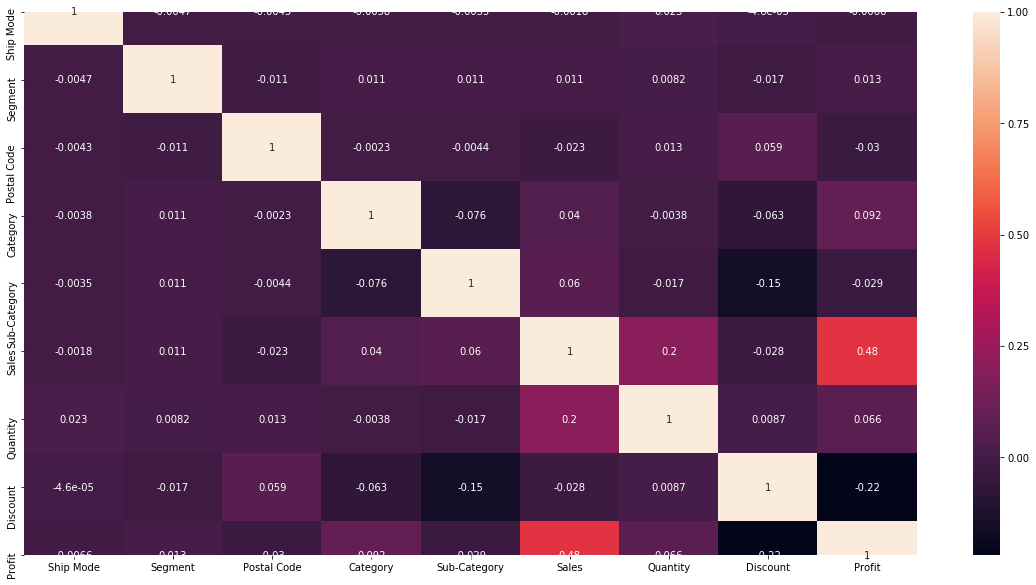

In [31]:
#Check Corr
plt.figure(figsize=(20,10))
sns.heatmap(retail.corr(), annot = True)

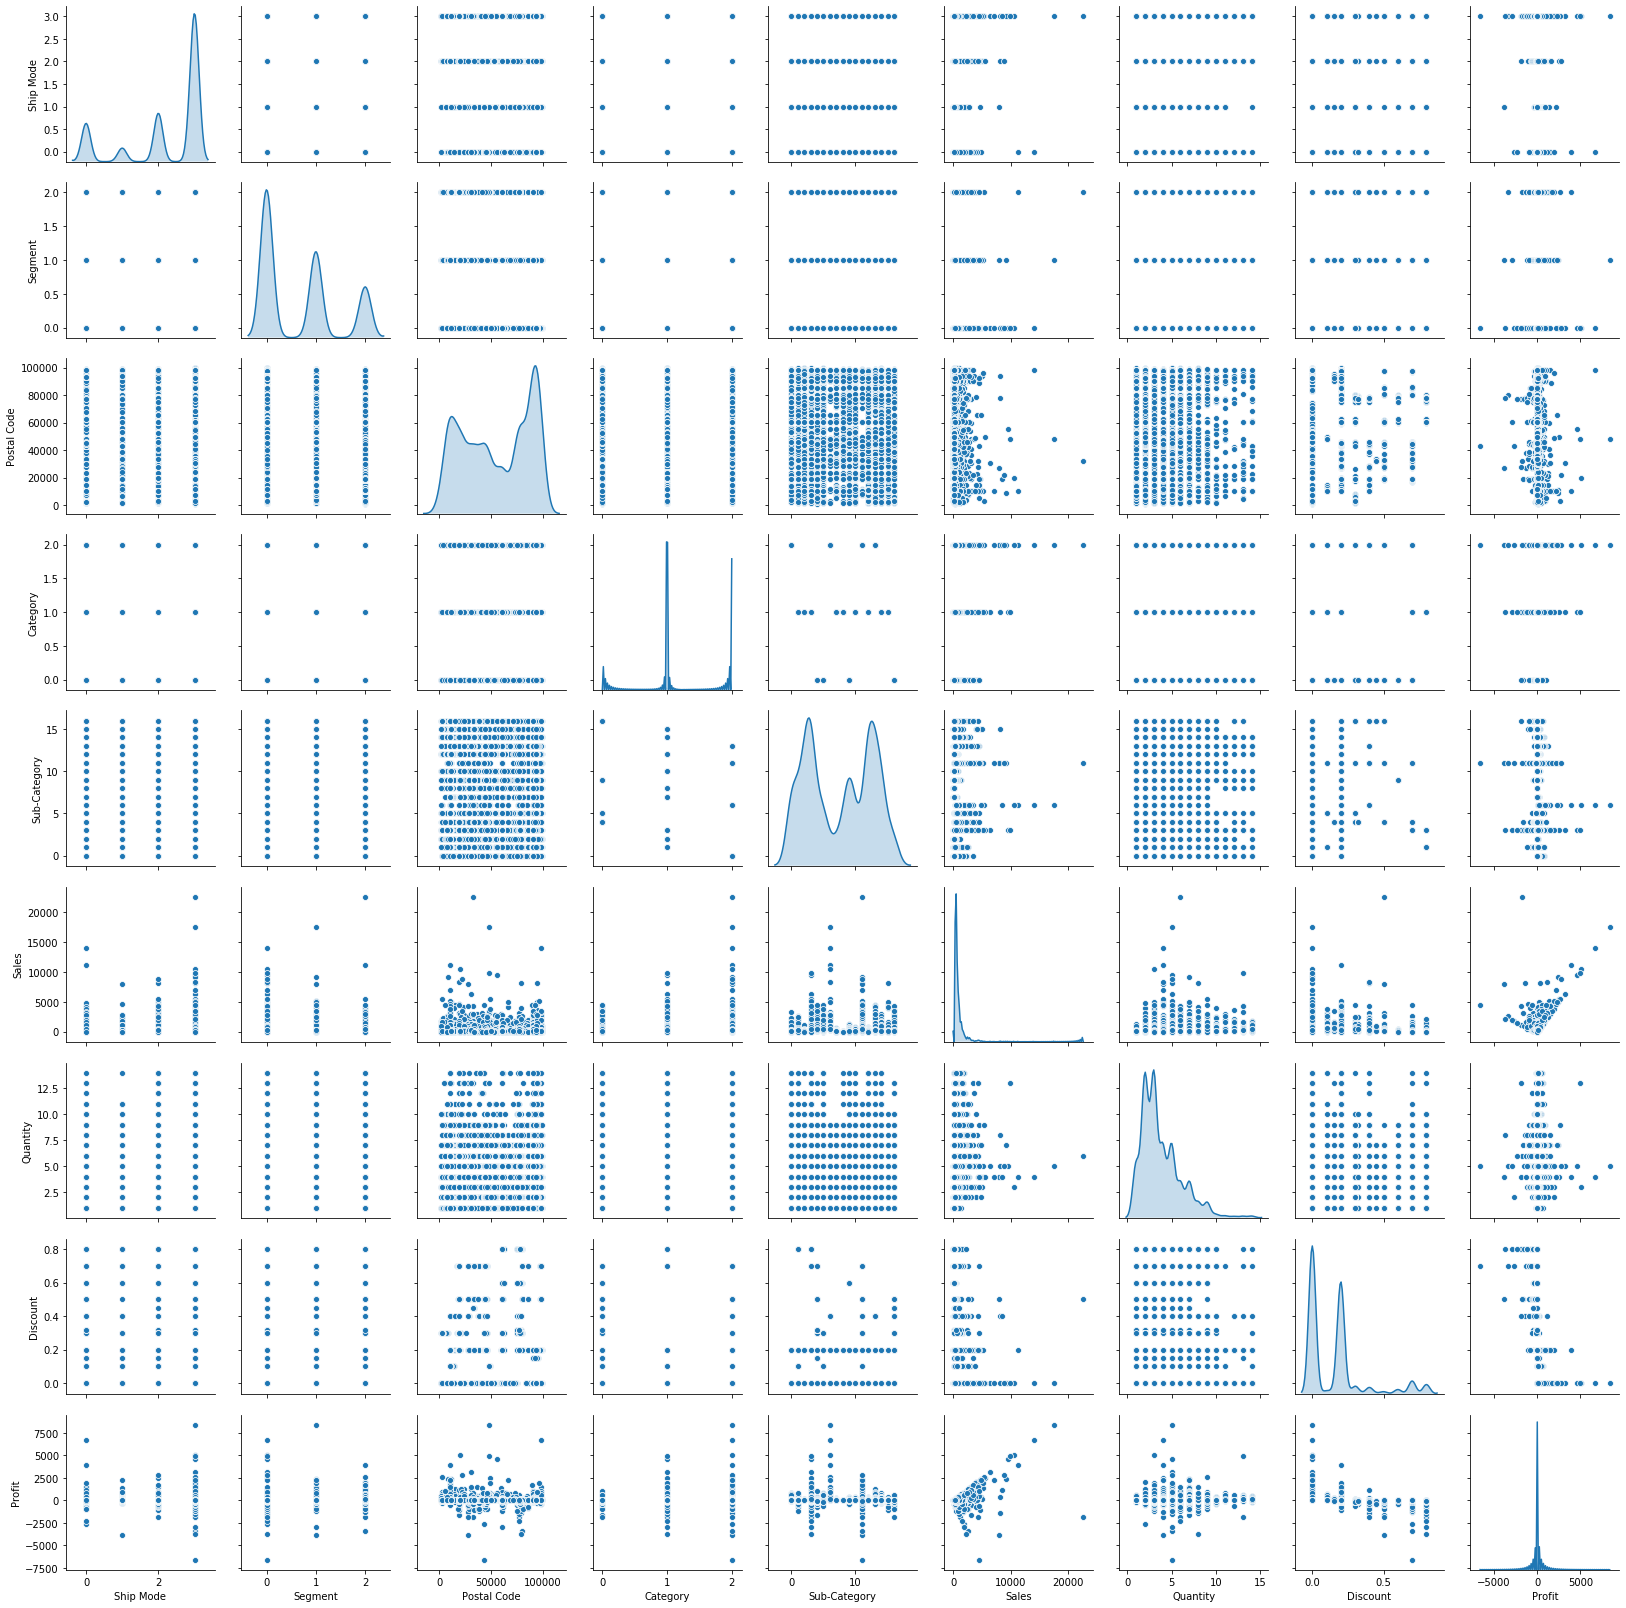

In [32]:
#Pairplot Visualize

sns.pairplot(retail, diag_kind='kde')